# Exploratory Analysis and Training simple model on Titanic data

In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Analysis (Data Cleaning)

In [3]:
data = fetch_openml('titanic', version=1, as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [31]:
df = data['data']

In [32]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None


In [33]:
df.isna().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [34]:
df = df.drop(["cabin", "boat", "body", "home.dest", "name", "fare", "ticket"], axis = 1)

In [35]:
df['sex'] = df['sex'].map({'female' : 0, 'male' : 1})

In [36]:
df['family'] = df['sibsp'] + df['parch']

In [37]:
df['survived'] = data.target

In [38]:
df = df.drop(["sibsp", "parch"], axis = 1)

In [39]:
df

,pclass,sex,age,embarked,family,survived
0,1.0,0,29.0000,S,0.0,1
1,1.0,1,0.9167,S,3.0,1
2,1.0,0,2.0000,S,3.0,0
3,1.0,1,30.0000,S,3.0,0
4,1.0,0,25.0000,S,3.0,0
...,...,...,...,...,...,...
1304,3.0,0,14.5000,C,1.0,0
1305,3.0,0,NaN,C,1.0,0
1306,3.0,1,26.5000,C,0.0,0
1307,3.0,1,27.0000,C,0.0,0


In [40]:
df['embarked'].unique()

['S', 'C', NaN, 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [62]:
df['embarked'] = df['embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

In [43]:
df.isna().sum()

pclass        0
sex           0
age         263
embarked      2
family        0
survived      0
dtype: int64

In [52]:
df.dtypes

pclass       float64
sex         category
age          float64
embarked    category
family       float64
survived    category
dtype: object

In [53]:
df['sex'] = df['sex'].astype('float64')
df['survived'] = df['survived'].astype('float64')

# PipeLine Process

Filling NAN Values

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
sip = SimpleImputer(strategy='most_frequent')
sip_mean = SimpleImputer(strategy='mean')

In [56]:
mean_transform = ["age"]
most_frequent_transform = ["embarked"]

In [58]:
df['age'] = sip_mean.fit_transform(df[mean_transform])

In [63]:
df['embarked'] = sip.fit_transform(df[most_frequent_transform])

In [64]:
df.isna().sum()

pclass      0
sex         0
age         0
embarked    0
family      0
survived    0
dtype: int64

In [65]:
df.dtypes

pclass      float64
sex         float64
age         float64
embarked    float64
family      float64
survived    float64
dtype: object

In [69]:
from sklearn.pipeline import Pipeline

In [70]:
mean_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])
most_frequent_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

## Creating Input and Target Data

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = df.drop('survived', axis = 1)
y = df['survived']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [87]:
X_train.shape

(1047, 5)

In [88]:
X_test.shape

(262, 5)

## Model Training and Testing

### Using logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
l_reg = LogisticRegression()

In [91]:
from sklearn.compose import ColumnTransformer

In [92]:
transformer = ColumnTransformer([
    ('mean_pipeline', mean_pipeline, mean_transform),
    ('most_frequent_pipeline', most_frequent_pipeline, most_frequent_transform)
],
    remainder="drop",
                              )

In [105]:
from sklearn.pipeline import make_pipeline

In [106]:
pipeline = make_pipeline(transformer, l_reg)

In [109]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('mean_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age']),
                                                 ('most_frequent_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['embarked'])])),
                ('logisticregression', LogisticRegression())])

In [115]:
pipeline.score(X_train, y_train)

0.6084049665711557

In [116]:
predictions = pipeline.predict(X_test)

In [117]:
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [118]:
from sklearn.metrics import accuracy_score

In [114]:
accuracy_score(y_test, predictions)

0.5725190839694656

#### Saving the Pipeline

*joblib library is used to save and reuse any pipeline*

In [120]:
import joblib

In [121]:
joblib.dump(pipeline, 'logesticPipeline.pkl')

['logesticPipeline.pkl']

### Using Support Vector Machine

In [122]:
from sklearn.svm import SVC

In [123]:
svm = SVC()

In [128]:
from sklearn.pipeline import make_pipeline

In [129]:
svm_pipeline = make_pipeline(transformer, svm)

In [130]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('mean_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age']),
                                                 ('most_frequent_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['embarked'])])),
                ('svc', SVC())])

In [131]:
svm_pipeline.score(X_train, y_train)

0.6389684813753582

In [132]:
svm_predictions = svm_pipeline.predict(X_test)

In [133]:
svm_predictions

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [134]:
accuracy_score(y_test, svm_predictions)

0.5992366412213741

### Using Decision Tree

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
dtc = DecisionTreeClassifier()

In [138]:
from sklearn.pipeline import make_pipeline

In [139]:
dtc_pipeline = make_pipeline(transformer, dtc)

In [140]:
dtc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('mean_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age']),
                                                 ('most_frequent_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['embarked'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [141]:
dtc_pipeline.score(X_train, y_train)

0.7220630372492837

In [142]:
dtc_pipeline.predict(X_test)

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [143]:
accuracy_score(y_test, dtc_pipeline.predict(X_test))

0.6450381679389313

In [146]:
from sklearn.tree import plot_tree

[Text(0.3987148416166029, 0.9761904761904762, 'x[1] <= 0.5\ngini = 0.469\nsamples = 1047\nvalue = [653, 394]'),
 Text(0.22190742763517204, 0.9285714285714286, 'x[0] <= 2.5\ngini = 0.413\nsamples = 371\nvalue = [108, 263]'),
 Text(0.1324412889131622, 0.8809523809523809, 'x[3] <= 0.5\ngini = 0.139\nsamples = 200\nvalue = [15, 185]'),
 Text(0.10759148006553795, 0.8333333333333334, 'x[2] <= 56.0\ngini = 0.193\nsamples = 129\nvalue = [14, 115]'),
 Text(0.0797378481703987, 0.7857142857142857, 'x[2] <= 30.5\ngini = 0.168\nsamples = 119\nvalue = [11, 108]'),
 Text(0.045876570180229385, 0.7380952380952381, 'x[2] <= 24.5\ngini = 0.221\nsamples = 71\nvalue = [9, 62]'),
 Text(0.017476788640087382, 0.6904761904761905, 'x[2] <= 3.0\ngini = 0.136\nsamples = 41\nvalue = [3, 38]'),
 Text(0.008738394320043691, 0.6428571428571429, 'x[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.004369197160021846, 0.5952380952380952, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.01310759148006553

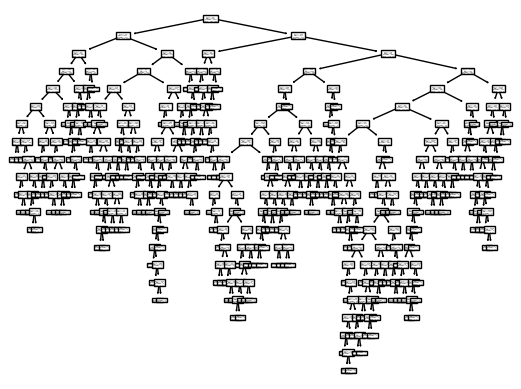

In [147]:
plot_tree(dtc.fit(X_train, y_train))

#### Save Pipeline

In [144]:
import joblib

In [145]:
joblib.dump(dtc_pipeline, 'dtcPipeline.pkl')

['dtcPipeline.pkl']